In [1]:
import torch
import pandas as pd 

df = pd.read_csv(r'D:\Data\UrbanSound8K\UrbanSound8K\metadata\UrbanSound8K.csv')
df

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.000000,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.500000,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.500000,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.000000,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.500000,72.500000,1,5,2,children_playing
...,...,...,...,...,...,...,...,...
8727,99812-1-2-0.wav,99812,159.522205,163.522205,2,7,1,car_horn
8728,99812-1-3-0.wav,99812,181.142431,183.284976,2,7,1,car_horn
8729,99812-1-4-0.wav,99812,242.691902,246.197885,2,7,1,car_horn
8730,99812-1-5-0.wav,99812,253.209850,255.741948,2,7,1,car_horn


In [2]:
import os
import pandas as pd
import torch
from torch.utils.data import Dataset
import torchaudio

torchaudio.set_audio_backend("soundfile")

class UrbanSoundDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        """
        Args:
            root_dir (str): Directory with all the audio subfolders.
            transform (callable, optional): Optional transform to be applied
                on a sample.
        """
        self.root_dir = root_dir
        self.metadata_path = os.path.join(self.root_dir, r"metadata\UrbanSound8K.csv")
        self.metadata = pd.read_csv(self.metadata_path)
        self.transform = transform

    def __len__(self):
        return len(self.metadata)

    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()

        audio_info = self.metadata.iloc[idx]
        fold = f"fold{audio_info['fold']}"
        file_name = audio_info['slice_file_name']
        file_path = os.path.join(self.root_dir, "audio", fold, file_name)

        waveform, sample_rate = torchaudio.load(file_path)

        label = audio_info['classID']
        class_name = audio_info['class']

        sample = {'waveform': waveform, 'sample_rate': sample_rate, 'label': label, 'class': class_name}

        if self.transform:
            sample = self.transform(sample)

        return sample

# Example usage:
root_dir = r"D:\Data\UrbanSound8K\UrbanSound8K"
urban_dataset = UrbanSoundDataset(root_dir=root_dir)

from torch.utils.data import DataLoader

urban_loader = DataLoader(urban_dataset, batch_size=16, shuffle=True)

C:\Users\Contempt\AppData\Local\Temp\ipykernel_24792\4159137827.py:7: UserWarning: torchaudio._backend.set_audio_backend has been deprecated. With dispatcher enabled, this function is no-op. You can remove the function call.
  torchaudio.set_audio_backend("soundfile")


In [3]:
import random

random_index = random.randint(0, len(urban_dataset) - 1)
random_sample = urban_dataset[random_index]

print(random_sample)

{'waveform': tensor([[-0.0378, -0.0426, -0.0453,  ..., -0.1764, -0.1650, -0.1505],
        [-0.0529, -0.0429, -0.0294,  ..., -0.1389, -0.1310, -0.1223]]), 'sample_rate': 48000, 'label': 8, 'class': 'siren'}


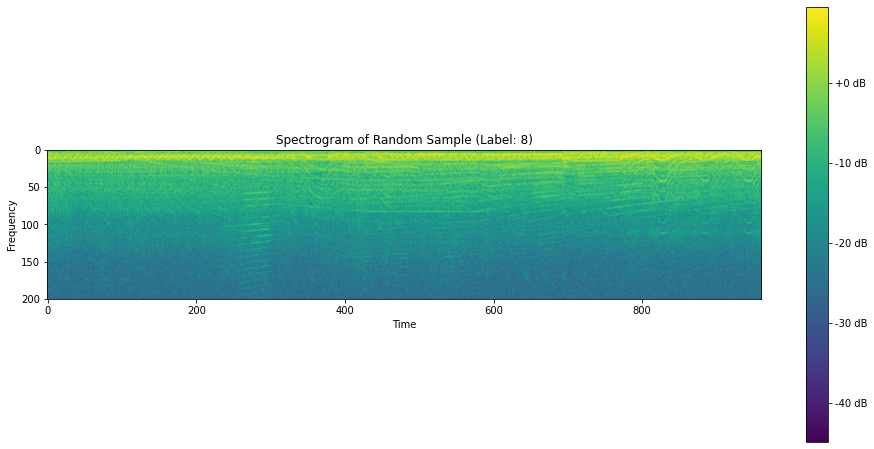

In [5]:
import torchaudio.transforms as transforms
import matplotlib.pyplot as plt


# Extract waveform and sample rate
waveform = random_sample['waveform']
sample_rate = random_sample['sample_rate']

# Create a spectrogram transform
spectrogram_transform = transforms.Spectrogram()

# Apply the spectrogram transform to the waveform
spectrogram = spectrogram_transform(waveform)

# Plot the spectrogram
plt.figure(figsize=(16, 8))
plt.imshow(spectrogram.log2()[0, :, :].numpy(), cmap='viridis')
plt.title(f"Spectrogram of Random Sample (Label: {random_sample['label']})")
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar(format='%+2.0f dB')
plt.show()